# Business Problem


* Apply the simple linear regression model for the data set Salary, 
* Decide whether there is a significant relationship between the variables in the linear regression model of the data set Salary at 5% significance level

In [19]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

#################### Model Building & data partition #####################
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split 

# Data Import

In [20]:
new = pd.read_csv(r"C:\Users\Aditya\Desktop\Desktop\IMARTICUS\Machine Learning\Linear Regression\Salary_Data.csv") 

# Looking at the first five rows
new.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [21]:
# Looking at the last five rows
new.tail()

,YearsExperience,Salary
25,9.0,105.582
26,9.5,116.969
27,9.6,112.635
28,10.3,122.391
29,10.5,121.872


# Data Type

In [22]:
# What type of values are stored in the columns?
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Univariate Analysis

In [23]:
new.describe()

,YearsExperience,Salary
count,30.000000,30.00000
mean,5.313333,76.00300
std,2.837888,27.41443
min,1.100000,37.73100
25%,3.200000,56.72075
50%,4.700000,65.23700
75%,7.700000,100.54475
max,10.500000,122.39100


# Identify & Treatment of Outlier 

<Axes: ylabel='YearsExperience'>

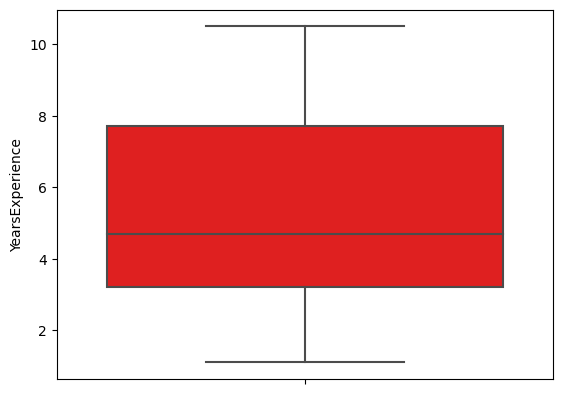

In [24]:
sns.boxplot(y='YearsExperience',data=new, color='red')

<Axes: ylabel='Salary'>

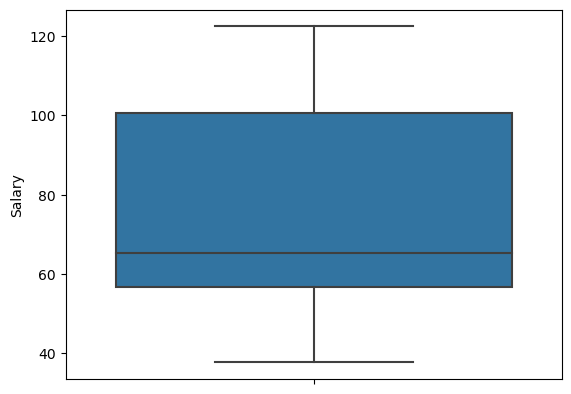

In [25]:
sns.boxplot(y='Salary',data=new)

### Missing Value

In [26]:
new.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Data Partition 

In [27]:
new.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [28]:
x = new[['YearsExperience']]
y = new[['Salary']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [29]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,YearsExperience,Salary
17,5.3,83.088
22,7.9,101.302
11,4.0,55.794
4,2.2,39.891
29,10.5,121.872


# Correlation 

#### Scatter Plot ( Bi-variate Analysis)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

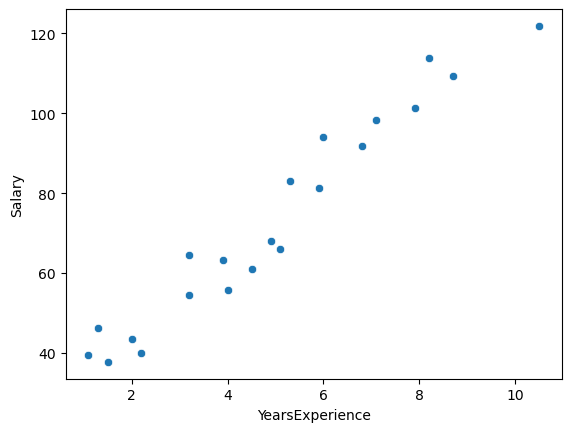

In [30]:
sns.scatterplot(x='YearsExperience', y='Salary',data=train)

#### Correlation Matrix

In [31]:
train.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.974123
Salary,0.974123,1.000000


<Axes: >

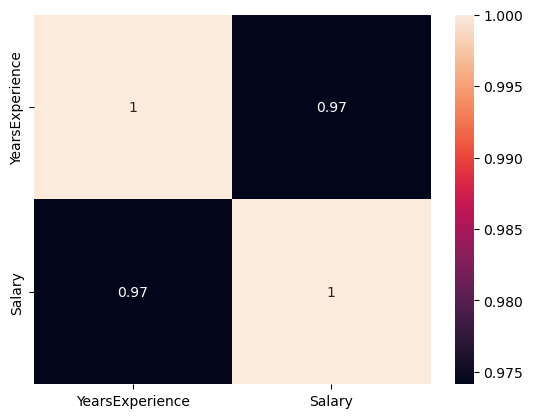

In [32]:
sns.heatmap(train.corr(),annot = True)

* 97% strong Positive correlation between salary & YearsExperience

# Model Building

### Hypotheis Testing

* H0 : - There is no relationship between the Salary & YearsExperience
    * Vs
* H1 : -There is  relationship between the Salary & YearsExperience

Alpha =5% ( 0.05 )

In [33]:
import statsmodels.formula.api as smf
model = smf.ols('Salary ~ YearsExperience', data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           9.91e-14
Time:                        15:34:44   Log-Likelihood:                -66.742
No. Observations:                  21   AIC:                             137.5
Df Residuals:                      19   BIC:                             139.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          25.2029      2.875      8.765      0.000      19.185      31.221
YearsExperience     9.7312      0.518     18.786      0.000       8.647      10.815
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

aov_table = sm.stats.anova_lm(reg, typ=2)

aov_table

# Conclusion 

* We Reject Ho
* There is  relationship between the Salary & YearsExperience
* Accuracy of Model is 95%, So Model is Good Fit 
* Y = 25.2029 + 9.7312 * YearsExperience

# Assumption of Model

* Linearity
* Homoscedasicity -- ( Constant Variance )
* Normality
* Model Error has to be independently identificaly Distibuted

# Linearity

<Axes: xlabel='Salary', ylabel='YearsExperience'>

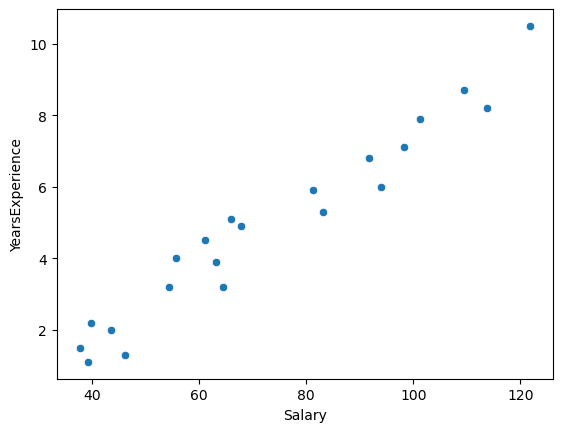

In [34]:
sns.scatterplot(x='Salary', y='YearsExperience',data=train)

In [35]:
train.head()

,YearsExperience,Salary
17,5.3,83.088
22,7.9,101.302
11,4.0,55.794
4,2.2,39.891
29,10.5,121.872


In [36]:
# y = Beta0 + Beta 1 * YearExperience
y  = 25.2029 + 9.7312 * 7.9
y

102.07938

In [37]:
train['fitted_value'] = model.fittedvalues # prediction  or fitted value
train['residual'] = model.resid  # error or residual

train.head()

,YearsExperience,Salary,fitted_value,residual
17,5.3,83.088,76.778268,6.309732
22,7.9,101.302,102.079398,-0.777398
11,4.0,55.794,64.127703,-8.333703
4,2.2,39.891,46.611536,-6.720536
29,10.5,121.872,127.380528,-5.508528


# Homoscedasicity ( Constant Variance )

<Axes: xlabel='fitted_value', ylabel='residual'>

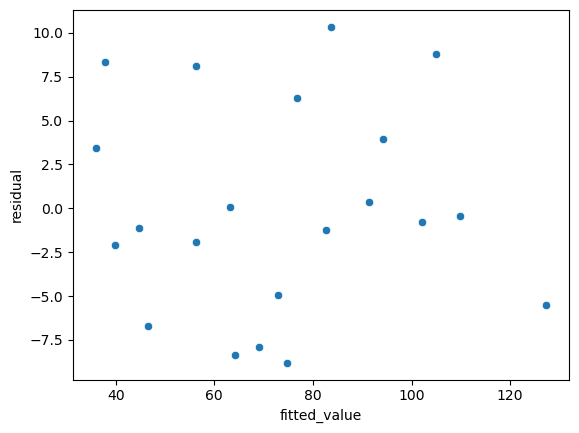

In [38]:
sns.scatterplot(x='fitted_value', y='residual',data=train)

# Normality

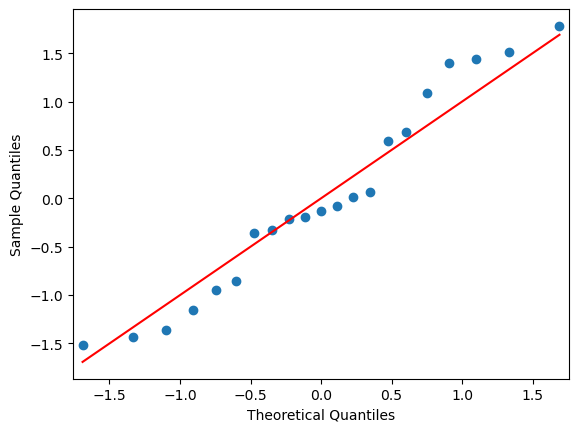

In [39]:
fig = sm.qqplot(train['residual'], fit=True, line='s') 

# s indicate standardized line
plt.show()

# Model Error are IID 

C:\Users\Aditya\AppData\Local\Temp\ipykernel_4132\199031023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train.residual)


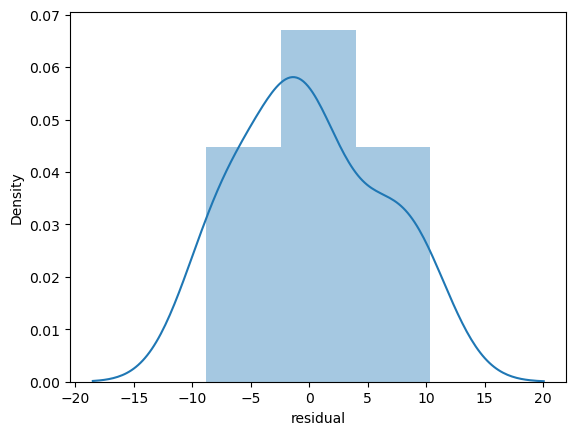

In [40]:
ax = sns.distplot(train.residual) 

# Prediction on Test Data (unseen data)

In [41]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,YearsExperience,Salary
9,3.7,57.189
26,9.5,116.969
28,10.3,122.391
13,4.1,57.081
5,2.9,56.642


In [42]:
y = 25.2029 + 9.7312 * 9.5 # manual 
y

117.6493

In [43]:
test['Predicted'] = model.predict(test)  # model = b0 , b1
test

,YearsExperience,Salary,Predicted
9,3.7,57.189,61.208342
26,9.5,116.969,117.649324
28,10.3,122.391,125.434287
13,4.1,57.081,65.100824
5,2.9,56.642,53.423379
12,4.0,56.957,64.127703
27,9.6,112.635,118.622445
25,9.0,105.582,112.783722
6,3.0,60.150,54.396499


# Train

In [44]:
from sklearn.metrics import r2_score
r2 = r2_score(train.Salary, train.fitted_value)
print('r2 score for perfect model is : ', np.round(r2,2)*100)

r2 score for perfect model is :  95.0


# Test

In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(test.Salary, test.Predicted)
print('R2 score for model Performance on Test : ', np.round(r2,2)*100)

R2 score for model Performance on Test :  96.0


* Model is good fit on Train & Performance on Test data is also good fit

# Prediction for Live Data  -- Population

In [46]:
d1 = {'Customer':pd.Series(['Suuny','Prashant','piyush']),
     'YearsExperience':pd.Series([5.4,2.5,0])}
live = pd.DataFrame(d1)
live

,Customer,YearsExperience
0,Suuny,5.4
1,Prashant,2.5
2,piyush,0.0


In [47]:
live['future Prediction']=np.round(model.predict(live))
live

,Customer,YearsExperience,future Prediction
0,Suuny,5.4,78.0
1,Prashant,2.5,50.0
2,piyush,0.0,25.0


# Extra

# Loss Function -- RMSE 

#### Train data

In [48]:
from sklearn.metrics import mean_squared_error 
model_mse = mean_squared_error(train['Salary'],train['fitted_value'])
model_rmse = np.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse)) #21

RMSE 5.81


#### Test data

In [49]:
model_mse = mean_squared_error(test['Salary'],test['Predicted'])
model_rmse = np.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse)) #9

RMSE 5.51





* Train Data :  RMSE <= 10 then model is good fit 

* Test Data :  RMSE <= 10 then model Performance on Test data is good 